Created on 9/03/23

By Matthew Chuang

Title: Exploratory Data Analysis of Californian Housing Prices (KNN)

This dataset was obtained through Kaggle: 
https://www.kaggle.com/datasets/camnugent/california-housing-prices

The data was collected through a 1990 California housing ensus. 

Import important modules:

In [16]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score



Take a look at the data:

In [10]:
df = pd.read_csv('housing.csv')

print(df.head())
print(df.shape)

#statistics of each column: (this is to see what I can use as a predictor variable)
df.describe()



   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  
(20640, 10)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


By skimming the Data, I observed that the column total_bedrooms had a lot of missing values.
To solve this issue, I replaced the empty values with the mean, as to not skew the data.


Cleaning the Data:


In [11]:
df['total_bedrooms'].fillna(df['total_bedrooms'].mean(), inplace=True)
#make sure theres no empty boxes
print(df.isna().sum())


longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64


To find the best predictor variable, I used correlation analysis. As for longitude and latitude I will be using a geographical visualization. 

Geographical Analysis Using Latitude, Longitude vs Median_house_values

In [12]:
geomap = px.scatter_mapbox(df, lat = 'latitude', lon = 'longitude', color = 'median_house_value', mapbox_style = 'open-street-map', hover_name = 'population', hover_data = ['median_house_value'], width = 1000, height = 1000)
geomap.show()

From this graph, I can see that properties near the coast of California (especially near San Francisco and Los Angeles) have the highest median house values. Properties more inwards near the mountain ranges have a median house value closer to 50-100k. 


Since we have multiple categorical variables within "Ocean Proximity", I will use one-hot encoding and confirm the relationship with the R-squared values. 

In [13]:
#separate response and predictors
x = df.drop('median_house_value', axis = 1)
y = df['median_house_value']

print(df.dtypes)
#Either true, or false for ocean_proximity

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.4, train_size = 0.6, random_state = 21)

#Will create two models, one with only numeric, the other without and compare the R-squared values


#Model 1:
#fitting the linreg model using only numeric values
numeric_features = ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']
model = LinearRegression().fit(x_train[numeric_features], y_train)
trainscore = model.score(x_train[numeric_features], y_train)
testscore = model.score(x_test[numeric_features], y_test)
print("Model 1(R^2):", trainscore, testscore)


#Model 2
#create dummy variables for categorical (assign binary to boolean)
x_train_new = pd.get_dummies(x_train, drop_first=True)
x_test_new = pd.get_dummies(x_test, drop_first = True)
x_train_new.dtypes

model2 = LinearRegression().fit(x_train_new, y_train)
trainscore = model2.score(x_train_new, y_train)
testscore = model2.score(x_test_new, y_test)
print("Model 2(R^2):", trainscore, testscore)


longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object
Model 1(R^2): 0.6371344000616332 0.632648802534699
Model 2(R^2): 0.6462960419199759 0.6433808388317941


The second model has a slightly better R-squared value than model 1, indicating that the categorical variable improved the fitting of the model.These models are fairly good, however there is still room for improvement. I will be possibly looking at the linear relationship between other variables and median_house_value, adding more features, or polynomial features. 

Correlation Coefficients:

In [24]:
df = df.drop(columns=['ocean_proximity'])
corr_func = df.corr()
#set our response variable to ascending order
predictor_correlation = corr_func['median_house_value'].sort_values(ascending = False)
print(predictor_correlation)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049454
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64


From the correlation coefficients, I can see that median_income is the closest.

Predicting House Prices with KNN:

I performed KNN regression on this dataset of housing prices as a baseline model.
This will give me an idea of the relationship between variables and be able to predict housing price.Although I know that ocean_proximity does affect our model, I want to explore the relationships between different variables.
Because of the size of this data set, I will be using a train_test_split with a test size of 40% and a train size of 60%.
To ensure reproducibility, we will be using a random_state.

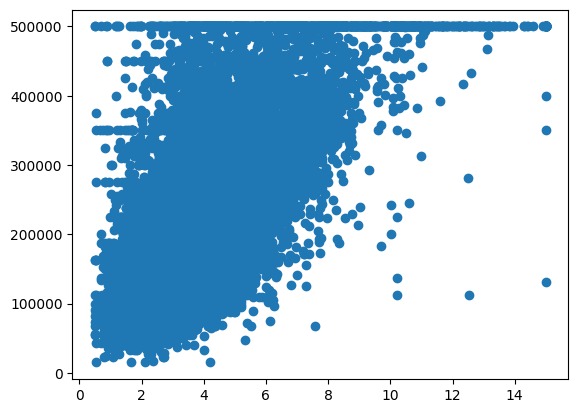

In [ ]:
#predictor (x) variable: I picked median_income because of its correlation coeficient
x = df[['median_income']]

#response (y) variable:
y = df['median_house_value']
plt.scatter(x,y)
plt.show()

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.4, train_size = 0.6, random_state = 21)



I will be performing KNN Regression. The first step is to choose a good value for K, which will represent the number of "neighbors" to consider when making a prediction. I will be using the MSE to see which K value is the best. The MSE serves as a way to measure the difference between predicted and actual values. 

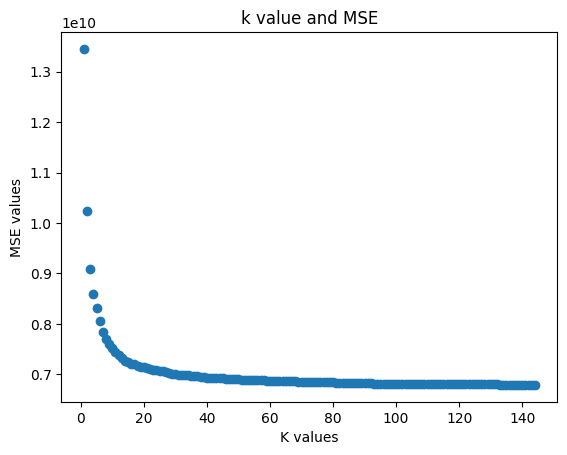

144


In [ ]:
#testing a range of k values
k_min = 1
k_max = 144 #used square root of the total dataset count
k_list = np.linspace(k_min, k_max, num = 144, dtype = int)

k_dict = {}
#loop through k values
for k_value in k_list:
    model = KNeighborsRegressor(n_neighbors=int(k_value))
    #train model for k value:
    model.fit(x_train, y_train)
    y_predicted = model.predict(x_test)

    #find each MSE value and store it into a dictionary
    MSE = mean_squared_error(y_test, y_predicted)
    k_dict[k_value] = MSE

#Making sure there is a relationship between our K-values and MSE that corresponds to it
plt.scatter(list(k_dict.keys()),list(k_dict.values()))
plt.xlabel('K values')
plt.ylabel('MSE values')
plt.title('k value and MSE')
plt.show()

#The lower the MSE value, the better the k value in this case.
#Given MSE's formula that incorporates the difference between the true and predicted value for the observation, 
#a lower MSE means that the predictions are closer to the actual values. 
top_k_value = min(k_dict, key=k_dict.get)
#each value in the k_dict corresponds to a given MSE value (Kind of like hashtables in c++)
print(top_k_value)

From this graph and for loop, it is clear that the highest K-value will hopefully give us the most accurate results. 

I implemented the KNN Algorithm by hand, getting values for the actual response variable and the predicted response variable.

In [ ]:
#define a function to find nearest neighbors

y_pred = []


def knn (x_train, x_test, y_train, y_test, k):
    for i, xi in enumerate(x_test.values):
        diff = pd.DataFrame((x_train.values - xi)**2, index = x_train.index) #from knn equation
        diff.columns = ['filled']

        #find the nearestneighbor
        nearestneighbor = diff.sort_values(by = 'filled').iloc[:k]
        Kmean = y_train[nearestneighbor.index].mean()
        y_pred.append(Kmean)
    actpred = pd.DataFrame({'y_true': y_test, 'y_pred': y_pred})
    #sort by ascending order
    actpredsorted = actpred.sort_values(by=['y_true', 'y_pred'], ascending=[True, True], inplace=True)
    return actpred

k = 144
best = knn(x_train, x_test, y_train, y_test, k)
best.head()

#the values we get from this function allow us to compare the actual values to the predicted values

r2 = r2_score(y_test, y_pred)
print(r2)

0.49124823089490777


An R-squared value of 0.49 indicates that about 49% of the variance within the response variable can be explained by the independent variable. Although this value is moderately okay, I may consider trying different k values to account for overfitting or underfitting. 